In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Dataset

Number of rows in the dataset: 24783
count of missing values:
count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64
first few rows:
   count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @vi

<ipython-input-2-ea9cc590bf75>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['class'], palette='Set2', linewidth=2)  # Adjust bar spacing with linewidth and set color palette


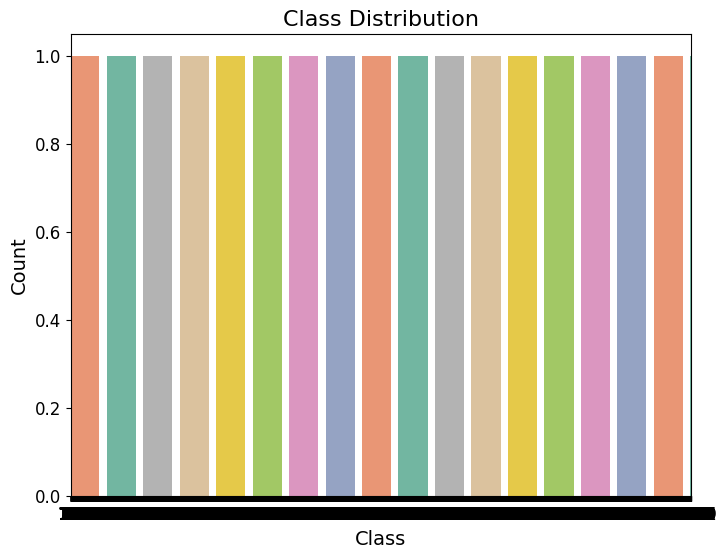

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')

# Display the count of data in the file
print(f"Number of rows in the dataset: {len(df)}")

# Check for missing values
print('count of missing values:')
print(df.isnull().sum())

# View the first few rows of the dataset
print('first few rows:')
print(df.head())

# Plot the class distribution with improved visualization
plt.figure(figsize=(8, 6))  # Set figure size to 8x6 inches
sns.countplot(df['class'], palette='Set2', linewidth=2)  # Adjust bar spacing with linewidth and set color palette
plt.title('Class Distribution', fontsize=16)  # Increase title font size
plt.xlabel('Class', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Count', fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=12)  # Increase x-ticks font size
plt.yticks(fontsize=12)  # Increase y-ticks font size
plt.show()

Preprocessing
Tokenization and Stop-word Removal

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Stop-word Removal
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]

    return ' '.join(filtered_words)

df['cleaned_text'] = df['tweet'].apply(preprocess_text)

# Display a sample of the cleaned data
print(df[['tweet', 'cleaned_text']].head())


                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                        cleaned_text  
0  rt mayasolovely woman complain cleaning house ...  
1  rt mleew17 boy dats cold tyga dwn bad cuffin d...  
2  rt urkindofbrand dawg rt 80sbaby4life ever fuc...  
3                                rt look like tranny  
4  rt shenikaroberts shit hear might true might f...  


EDA (Exploratory Data Analysis)

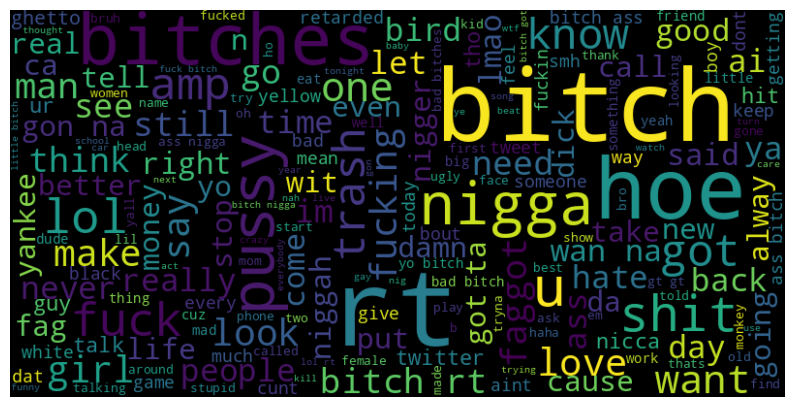

In [5]:
# Word cloud of most frequent words
from wordcloud import WordCloud

all_words = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Feature Engineering
TF-IDF Vectorization

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['class']

# Display the shape of the TF-IDF matrix
print(f"Shape of TF-IDF matrix: {X.shape}")

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print(f"Size of training set: {X_train.shape[0]}")
print(f"Size of testing set: {X_test.shape[0]}")


Shape of TF-IDF matrix: (24783, 5000)
Size of training set: 19826
Size of testing set: 4957


Model Selection and Training

Naive Bayes

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

# Output after Naive Bayes training
print("Naive Bayes Model Evaluation:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model Evaluation:
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       290
           1       0.83      0.99      0.90      3832
           2       0.87      0.41      0.56       835

    accuracy                           0.84      4957
   macro avg       0.79      0.47      0.49      4957
weighted avg       0.83      0.84      0.79      4957



SVM

In [8]:
from sklearn.svm import SVC

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100)  # Reduce to 100 components or choose an appropriate number
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM on reduced data
svm_model = SVC(probability=True)
svm_model.fit(X_train_pca, y_train)

y_pred_svm = svm_model.predict(X_test_pca)

# Output after SVM training
print("SVM Model Evaluation after PCA:")
print(classification_report(y_test, y_pred_svm))



SVM Model Evaluation after PCA:
              precision    recall  f1-score   support

           0       0.49      0.06      0.11       290
           1       0.92      0.94      0.93      3832
           2       0.72      0.86      0.78       835

    accuracy                           0.87      4957
   macro avg       0.71      0.62      0.61      4957
weighted avg       0.86      0.87      0.86      4957



Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Output after Random Forest training
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.48      0.13      0.21       290
           1       0.92      0.96      0.94      3832
           2       0.82      0.86      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.65      0.66      4957
weighted avg       0.88      0.89      0.88      4957



LSTM

In [10]:
# Install keras-tuner for hyperparameter tuning
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [12]:
# Tokenizing for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_text'])
X_seq = tokenizer.texts_to_sequences(df['cleaned_text'])
X_seq = pad_sequences(X_seq, maxlen=200)

# Splitting for LSTM
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# Convert '2' labels to '1' for binary classification
y_train_seq = np.where(y_train_seq == 2, 1, y_train_seq)
y_test_seq = np.where(y_test_seq == 2, 1, y_test_seq)

# Building the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the LSTM model
history = lstm_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64, validation_data=(X_test_seq, y_test_seq))

y_pred_lstm = lstm_model.predict(X_test_seq)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

# Output after LSTM training
print("LSTM Model Evaluation:")
print(classification_report(y_test_seq, y_pred_lstm))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 176s 548ms/step - accuracy: 0.9313 - loss: 0.2543 - val_accuracy: 0.9395 - val_loss: 0.1742
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 175s 461ms/step - accuracy: 0.9500 - loss: 0.1477 - val_accuracy: 0.9417 - val_loss: 0.1703
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 216s 506ms/step - accuracy: 0.9569 - loss: 0.1204 - val_accuracy: 0.9391 - val_loss: 0.1748
Epoch 4/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 189s 464ms/step - accuracy: 0.9615 - loss: 0.1020 - val_accuracy: 0.9361 - val_loss: 0.1830
Epoch 5/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 201s 460ms/step - accuracy: 0.9681 - loss: 0.0875 - val_accuracy: 0.9375 - val_loss: 0.2029
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step
LSTM Model Evaluation:
              precision    recall  f1-score   support

           0       0.43      0.22      0.29       290
           1       0.95      0.98      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.69      0.60      0.63      4957
weighte

Model Evaluation and Plotting

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

def evaluate_model(y_test, y_pred, model, is_binary=True, X_test=None, X_test_seq=None):
    print(f"Evaluation metrics for {model}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    if is_binary:
        # ROC-AUC score for binary classification
        y_proba = model.predict_proba(X_test)[:, 1] if model != lstm_model else lstm_model.predict(X_test_seq)
        print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, marker='.', label=f'{model} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        # ROC-AUC score for multi-class classification
        y_proba = model.predict_proba(X_test) if model != lstm_model else lstm_model.predict(X_test_seq)
        print(f"AUC-ROC (OvR): {roc_auc_score(y_test, y_proba, multi_class='ovr'):.4f}")
        print(f"AUC-ROC (OvO): {roc_auc_score(y_test, y_proba, multi_class='ovo'):.4f}")


Evaluate the model

In [14]:
evaluate_model(y_test, y_pred_nb, nb_model, is_binary=False, X_test=X_test)
evaluate_model(y_test, y_pred_svm, svm_model, is_binary=False, X_test=X_test_pca)
evaluate_model(y_test, y_pred_rf, rf_model, is_binary=False, X_test=X_test)


Evaluation metrics for MultinomialNB():
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       290
           1       0.83      0.99      0.90      3832
           2       0.87      0.41      0.56       835

    accuracy                           0.84      4957
   macro avg       0.79      0.47      0.49      4957
weighted avg       0.83      0.84      0.79      4957

Confusion Matrix:
[[   2  273   15]
 [   1 3795   36]
 [   0  492  343]]
Accuracy: 0.8352
AUC-ROC (OvR): 0.8699
AUC-ROC (OvO): 0.8282
Evaluation metrics for SVC(probability=True):
              precision    recall  f1-score   support

           0       0.49      0.06      0.11       290
           1       0.92      0.94      0.93      3832
           2       0.72      0.86      0.78       835

    accuracy                           0.87      4957
   macro avg       0.71      0.62      0.61      4957
weighted avg       0.86      0.87      0.86      4957

Confusion Matrix:


Evaluation metrics for <Sequential name=sequential, built=True>:
              precision    recall  f1-score   support

           0       0.43      0.22      0.29       290
           1       0.95      0.98      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.69      0.60      0.63      4957
weighted avg       0.92      0.94      0.93      4957

Confusion Matrix:
[[  63  227]
 [  83 4584]]
Accuracy: 0.9375
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step
AUC-ROC: 0.8338


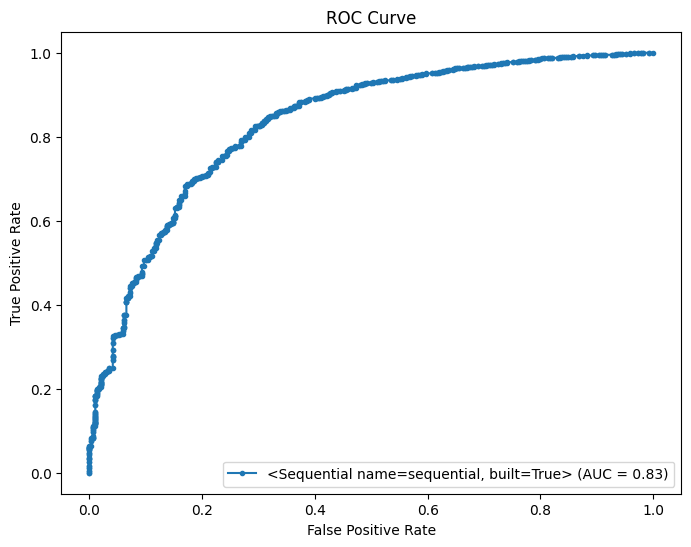

In [15]:
# Evaluate the LSTM model
evaluate_model(y_test_seq, y_pred_lstm, lstm_model, X_test_seq=X_test_seq)

ROC Curve for Naive Bayes

Evaluation metrics for MultinomialNB():
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       290
           1       0.83      0.99      0.90      3832
           2       0.87      0.41      0.56       835

    accuracy                           0.84      4957
   macro avg       0.79      0.47      0.49      4957
weighted avg       0.83      0.84      0.79      4957

Confusion Matrix:
[[   2  273   15]
 [   1 3795   36]
 [   0  492  343]]
Accuracy: 0.8352


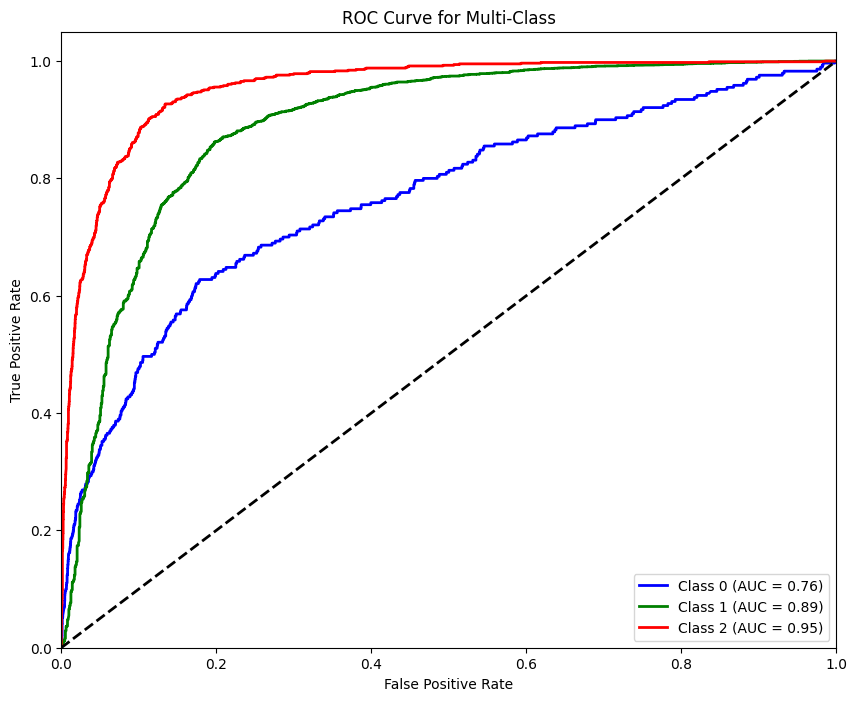

AUC-ROC (OvR): 0.8699
AUC-ROC (OvO): 0.8282


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def evaluate_model(y_test, y_pred, model, is_binary=True, X_test=None, X_test_seq=None):
    print(f"Evaluation metrics for {model}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    if is_binary:
        # ROC-AUC score for binary classification
        y_proba = model.predict_proba(X_test)[:, 1] if model != lstm_model else lstm_model.predict(X_test_seq)
        print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, marker='.', label=f'{model} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        # Binarize the output
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        y_proba = model.predict_proba(X_test) if model != lstm_model else lstm_model.predict(X_test_seq)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        n_classes = y_test_bin.shape[1]

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i])

        # Plot all ROC curves
        plt.figure(figsize=(10, 8))
        colors = ['blue', 'green', 'red']  # Add more colors if you have more classes
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Multi-Class')
        plt.legend(loc="lower right")
        plt.show()

        print(f"AUC-ROC (OvR): {roc_auc_score(y_test, y_proba, multi_class='ovr'):.4f}")
        print(f"AUC-ROC (OvO): {roc_auc_score(y_test, y_proba, multi_class='ovo'):.4f}")

# Assuming you've already fit the model and have predictions
evaluate_model(y_test, y_pred_nb, nb_model, is_binary=False, X_test=X_test)


ROC Curve for SVM

Evaluation metrics for SVC(probability=True):
              precision    recall  f1-score   support

           0       0.49      0.06      0.11       290
           1       0.92      0.94      0.93      3832
           2       0.72      0.86      0.78       835

    accuracy                           0.87      4957
   macro avg       0.71      0.62      0.61      4957
weighted avg       0.86      0.87      0.86      4957

Confusion Matrix:
[[  18  204   68]
 [  17 3599  216]
 [   2  114  719]]
Accuracy: 0.8747


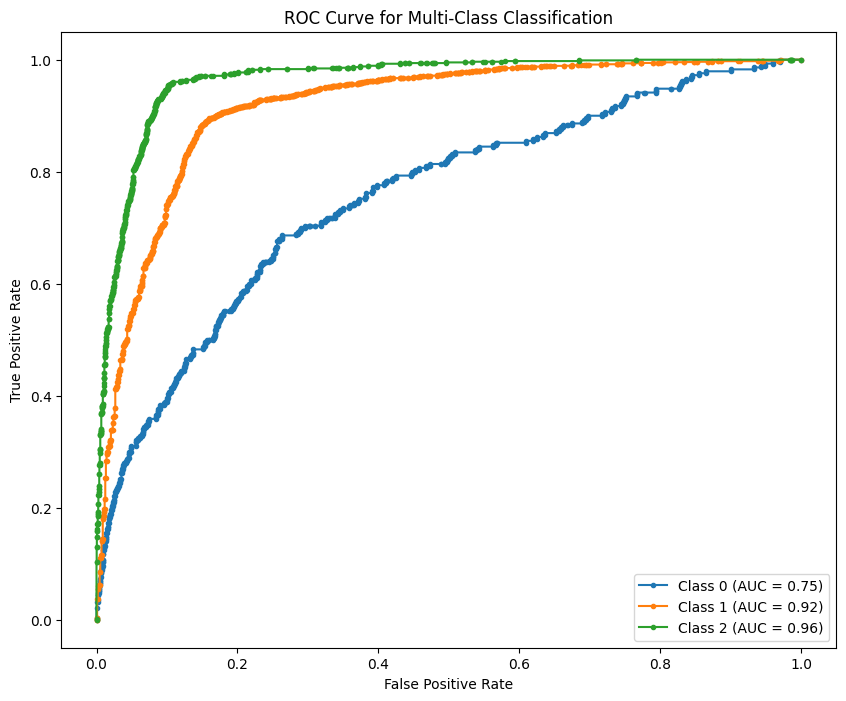

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(y_test, y_pred, model, is_binary=True, X_test=None, X_test_seq=None):
    print(f"Evaluation metrics for {model}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    if is_binary:
        # ROC-AUC score for binary classification
        y_proba = model.predict_proba(X_test)[:, 1] if model != lstm_model else lstm_model.predict(X_test_seq)
        print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, marker='.', label=f'{model} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        # ROC-AUC score for multi-class classification
        y_proba = model.predict_proba(X_test) if model != lstm_model else lstm_model.predict(X_test_seq)

        # One-vs-Rest (OvR) ROC Curve
        n_classes = y_proba.shape[1]
        y_test_bin = np.eye(n_classes)[y_test]  # Convert y_test to one-hot encoding

        plt.figure(figsize=(10, 8))

        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, marker='.', label=f'Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_proba[:, i]):.2f})')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Multi-Class Classification')
        plt.legend(loc='lower right')
        plt.show()

# Example usage:
evaluate_model(y_test, y_pred_svm, svm_model, is_binary=False, X_test=X_test_pca)


ROC Curve for Random Forest

Random Forest Model Evaluation:
Evaluation metrics for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.48      0.15      0.23       290
           1       0.92      0.95      0.94      3832
           2       0.81      0.86      0.83       835

    accuracy                           0.89      4957
   macro avg       0.74      0.65      0.67      4957
weighted avg       0.87      0.89      0.88      4957

Confusion Matrix:
[[  43  206   41]
 [  44 3659  129]
 [   3  116  716]]
Accuracy: 0.8913


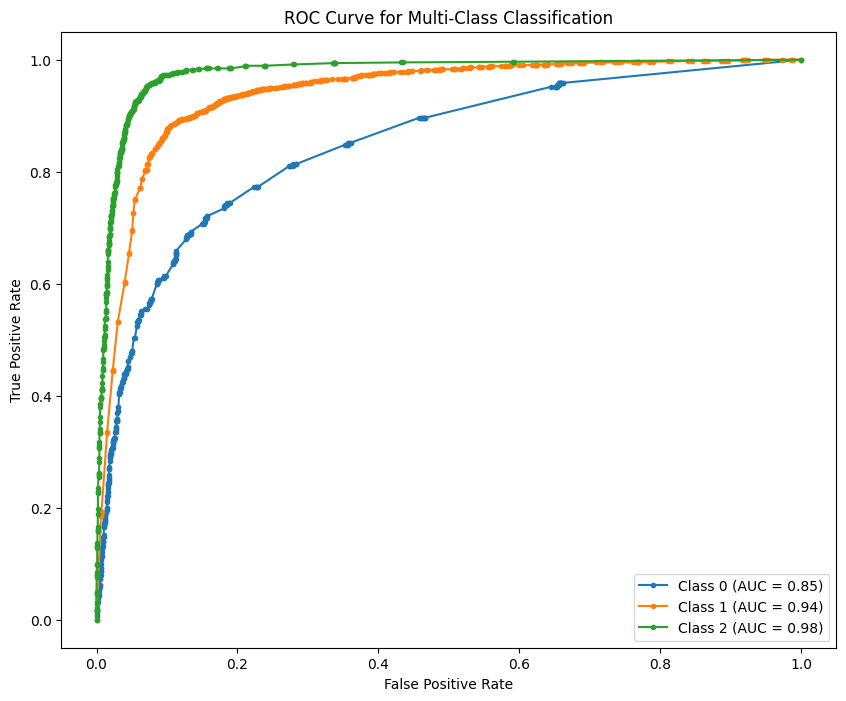

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(y_test, y_pred, model, is_binary=True, X_test=None, X_test_seq=None):
    print(f"Evaluation metrics for {model}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    if is_binary:
        # ROC-AUC score for binary classification
        y_proba = model.predict_proba(X_test)[:, 1]
        print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, marker='.', label=f'{model} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        # ROC-AUC score for multi-class classification
        y_proba = model.predict_proba(X_test)
        n_classes = y_proba.shape[1]
        y_test_bin = np.eye(n_classes)[y_test]

        plt.figure(figsize=(10, 8))

        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, marker='.', label=f'Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_proba[:, i]):.2f})')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Multi-Class Classification')
        plt.legend(loc='lower right')
        plt.show()

# Example usage with RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate and plot ROC curves
print("Random Forest Model Evaluation:")
evaluate_model(y_test, y_pred_rf, rf_model, is_binary=False, X_test=X_test)


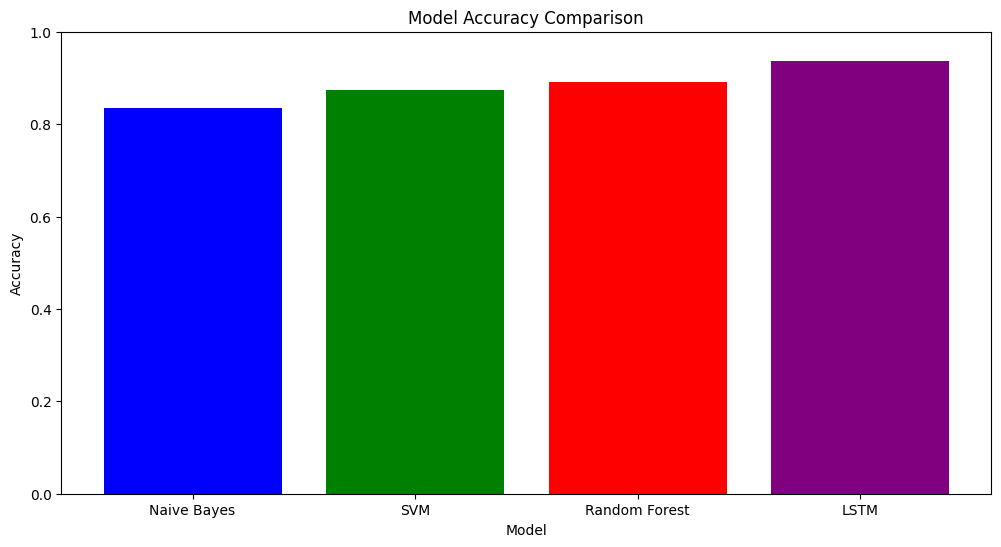

In [26]:
# Store accuracies in a dictionary
accuracies = {
    'Naive Bayes': 0.8352 ,
    'SVM': 0.8747,
    'Random Forest': 0.8913,
    'LSTM': 0.9375
}

# Plot accuracies
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()